# Import library

In [ ]:
!pip install folium
!pip install geopandas
import pandas as pd
import folium
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from IPython.display import display
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Import dataset

In [ ]:
df = pd.read_csv("/content/hasil_elbow_method.csv")
df.head()

,Id,Tanggal Kejadian,Waktu Kejadian,Alamat Kejadian,Latitude,Longitude,Jenis Kendaraan R,jam,Tanggal,Bulan,Tahun,hari,cluster
0,1,13/01/2023,1350,"JL. PH. H. MUSTOPA NO.31, KOTA BANDUNG KEL PAD...",-6.899781,107.644289,0,22,13,1,2023,Jumat,2
1,2,21/01/2023,390,"JL. SIDOMUKTI NO 11, KEL. SUKALUYU, KEC. CIBEU...",-6.895089,107.628508,0,6,21,1,2023,Sabtu,0
2,3,21/01/2023,390,"JL. SIDOMUKTI NO 11, KEL. SUKALUYU, KEC. CIBEU...",-6.895089,107.628508,0,6,21,1,2023,Sabtu,0
3,4,21/01/2023,1230,"JL. CIGADUNG RAYA TENGAH NO.28, KEL. CIGADUNG ...",-6.883221,107.630975,0,20,21,1,2023,Sabtu,0
4,5,25/01/2023,1380,"JL. CIGADUNG RAYA TIMUR, KEL. CIGADUNG KEC. CI...",-6.884179,107.632519,1,23,25,1,2023,Rabu,0


# Koordinat kota Bandung

In [ ]:
# Tentukan lokasi pusat peta (koordinat pusat Kota Bandung)
center_lat = -6.9175
center_lon = 107.6191

# Buat peta dasar
map_bandung = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Muat file GeoJSON batas administrasi
geojson_path = '/content/3273-kota-bandung.json'
folium.GeoJson(geojson_path, name='Batas Administrasi').add_to(map_bandung)
map_bandung.save('batas_administrasi_kota_bandung.html')

# Tampilkan peta
map_bandung

# Pemetaan alamat kejadian menggunakan koordinat

In [ ]:
# Tambahkan marker untuk dataset (contoh sebelumnya)
df = pd.read_csv('/content/hasil_elbow_method.csv')

# Menghapus baris duplikat berdasarkan kolom Latitude dan Longitude
df = df.drop_duplicates(subset=['Latitude', 'Longitude'])

# Tampilkan jumlah baris dan kolom setelah menghapus duplikasi
print(f"Jumlah baris dan kolom setelah menghapus duplikasi: {df.shape}")

# Define colors for each cluster (assuming 'cluster' column exists)
colors = {0: 'blue', 1: 'orange', 2: 'red'}

for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Cluster: {row['cluster']}",  # Access the 'cluster' column here
        icon=folium.Icon(color=colors[row['cluster']])  # Access the 'cluster' column here
    ).add_to(map_bandung)

# Tambahkan kolom kategori dan warna berdasarkan cluster
df['kategori'] = df['cluster'].map({0: 'Cukup Rawan', 1: 'Aman', 2: 'Rawan'})
df['warna'] = df['cluster'].map({0: 'orange', 1: 'blue', 2: 'red'})

# Hitung jumlah kejadian untuk setiap kategori
kategori_counts = df['kategori'].value_counts().reindex(['Aman', 'Cukup Rawan', 'Rawan']).reset_index()
kategori_counts.columns = ['Kategori', 'Jumlah Kejadian']

# Tambahkan warna untuk setiap kategori
kategori_counts['Warna'] = kategori_counts['Kategori'].map({'Aman': 'blue', 'Cukup Rawan': 'orange', 'Rawan': 'red'})

Jumlah baris dan kolom setelah menghapus duplikasi: (412, 13)


In [ ]:
#map_bandung.save('map_dengan_marker_cluster.html')
map_bandung

# Pemetaan berdasarkan Cluster 0

In [ ]:
# Filter Cluster 0
cluster_0 = df[df['cluster'] == 0]

# Tentukan koordinat pusat peta
center_lat = cluster_0['Latitude'].mean()
center_lon = cluster_0['Longitude'].mean()

# Buat peta dasar
peta = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Tambahkan batas administrasi menggunakan file GeoJSON
# Gantilah 'path_to_bandung_geojson' dengan lokasi file GeoJSON kamu
folium.GeoJson(
    '/content/3273-kota-bandung.json',
    name='Batas Administrasi Bandung',
).add_to(peta)

# Tambahkan marker untuk setiap titik di Cluster 0 dengan pop-up alamat dan waktu kejadian
for _, row in cluster_0.iterrows():
    popup_text = f"Alamat: {row['Alamat Kejadian']}<br>Waktu Kejadian: {row['jam']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,  # Menampilkan alamat dan waktu kejadian
        icon=folium.Icon(color='blue')  # Sesuaikan warna dengan cluster
    ).add_to(peta)

# Tambahkan Layer Control
folium.LayerControl().add_to(peta)

# Tampilkan peta
#peta.save('peta_alamat_kejadian_cluster_0.html')
peta

# Pemetaan berdasarkan Cluster 1

In [ ]:
# Filter Cluster 1
cluster_0 = df[df['cluster'] == 1]

# Tentukan koordinat pusat peta
center_lat = cluster_0['Latitude'].mean()
center_lon = cluster_0['Longitude'].mean()

# Buat peta dasar
peta = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Tambahkan batas administrasi menggunakan file GeoJSON
# Gantilah 'path_to_bandung_geojson' dengan lokasi file GeoJSON kamu
folium.GeoJson(
    '/content/3273-kota-bandung.json',
    name='Batas Administrasi Bandung',
).add_to(peta)

# Tambahkan marker untuk setiap titik di Cluster 0 dengan pop-up alamat dan waktu kejadian
for _, row in cluster_0.iterrows():
    popup_text = f"Alamat: {row['Alamat Kejadian']}<br>Waktu Kejadian: {row['jam']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,  # Menampilkan alamat dan waktu kejadian
        icon=folium.Icon(color='orange')  # Sesuaikan warna dengan cluster
    ).add_to(peta)

# Tambahkan Layer Control
folium.LayerControl().add_to(peta)

# Tampilkan peta
#peta.save('peta_alamat_kejadian_cluster_1.html')
peta

# Pemetaan berdasarkan Cluster 2

In [ ]:
# Filter Cluster 1
cluster_0 = df[df['cluster'] == 2]

# Tentukan koordinat pusat peta
center_lat = cluster_0['Latitude'].mean()
center_lon = cluster_0['Longitude'].mean()

# Buat peta dasar
peta = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Tambahkan batas administrasi menggunakan file GeoJSON
# Gantilah 'path_to_bandung_geojson' dengan lokasi file GeoJSON kamu
folium.GeoJson(
    '/content/3273-kota-bandung.json',
    name='Batas Administrasi Bandung',
).add_to(peta)

# Tambahkan marker untuk setiap titik di Cluster 0 dengan pop-up alamat dan waktu kejadian
for _, row in cluster_0.iterrows():
    popup_text = f"Alamat: {row['Alamat Kejadian']}<br>Waktu Kejadian: {row['jam']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,  # Menampilkan alamat dan waktu kejadian
        icon=folium.Icon(color='red')  # Sesuaikan warna dengan cluster
    ).add_to(peta)

# Tambahkan Layer Control
folium.LayerControl().add_to(peta)

# Tampilkan peta
#peta.save('peta_alamat_kejadian_cluster_2.html')
peta

# Visualisasi diagram batang setiap cluster

Jumlah data dalam setiap cluster:
cluster
2    199
0    121
1     92
Name: count, dtype: int64


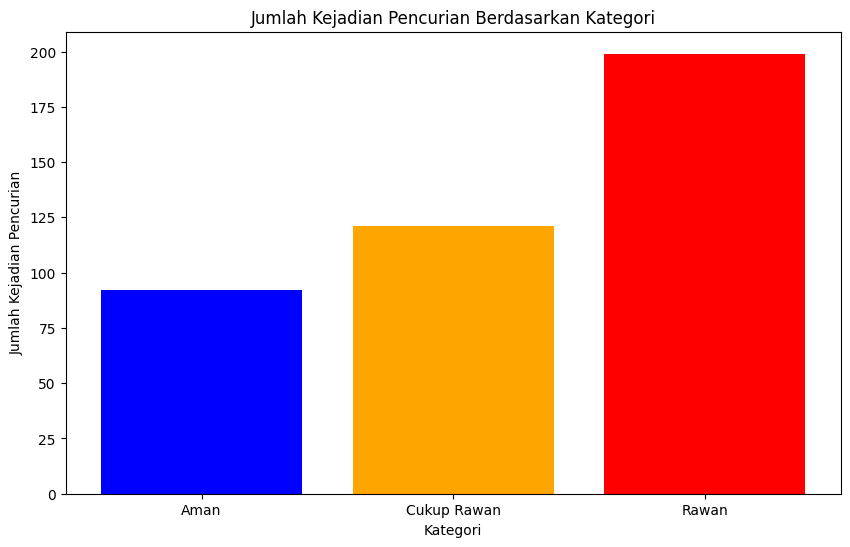

In [ ]:
# Menampilkan jumlah data dalam setiap cluster
cluster_counts = df['cluster'].value_counts()
print("Jumlah data dalam setiap cluster:")
print(cluster_counts)

# Buat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(kategori_counts['Kategori'], kategori_counts['Jumlah Kejadian'], color=kategori_counts['Warna'])

plt.xlabel('Kategori')
plt.ylabel('Jumlah Kejadian Pencurian')
plt.title('Jumlah Kejadian Pencurian Berdasarkan Kategori')
plt.show()

# Distribusi kejadian menggunakan pie chart

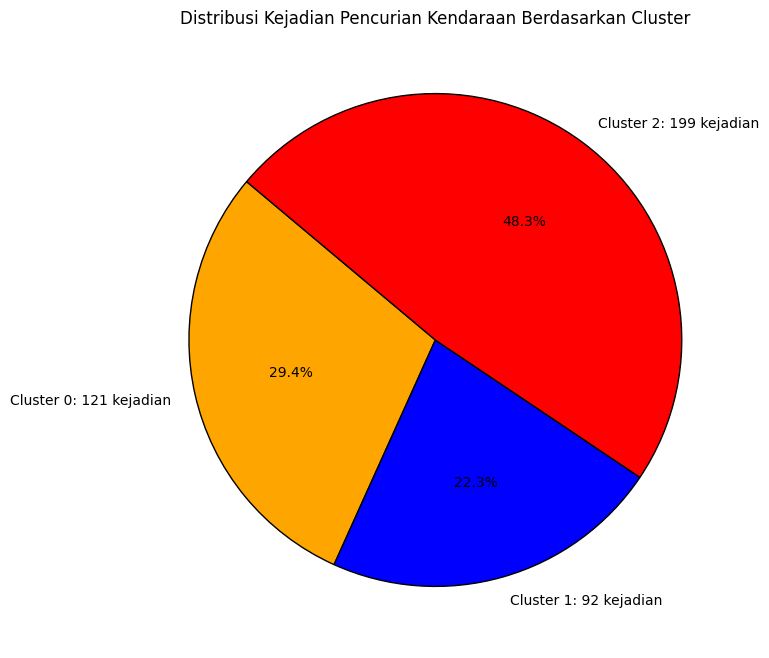

In [ ]:
# Hitung jumlah kejadian per cluster
cluster_counts = df['cluster'].value_counts().sort_index()

# Tentukan warna untuk setiap cluster
colors = ['orange', 'blue', 'red']  # Sesuaikan dengan urutan cluster yang ada

# Buat label yang menggabungkan nama cluster dengan jumlah kejadian
labels = [f'Cluster {i}: {count} kejadian' for i, count in cluster_counts.items()]

# Buat Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    cluster_counts,
    labels=labels,  # Label yang berisi cluster dan jumlah kejadian
    autopct='%1.1f%%',  # Menampilkan persentase
    colors=colors,  # Warna untuk setiap cluster
    startangle=140,  # Sudut awal
    wedgeprops={'edgecolor': 'black'}  # Warna tepi pie chart
)
plt.title('Distribusi Kejadian Pencurian Kendaraan Berdasarkan Cluster')
plt.show()

# Pemetaan menggunakan heatmap

In [ ]:
# Tentukan lokasi pusat peta (misalnya koordinat pusat Kota Bandung)
center_lat = -6.9175
center_lon = 107.6191

# Buat peta dasar
map_bandung = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Siapkan data untuk heatmap
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]

# Tambahkan layer heatmap ke peta
HeatMap(heat_data).add_to(map_bandung)

# Tambahkan layer kontrol
folium.LayerControl().add_to(map_bandung)

# Simpan peta sebagai file HTML
#map_bandung.save('heatmap_pencurian_kotabandung.html')

# Tampilkan peta langsung di Jupyter Notebook
map_bandung

# Pemetaan pusat pada koordinat

In [ ]:
# Buat peta pusat pada koordinat tertentu
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=13)

# Buat Marker Cluster
marker_cluster = MarkerCluster().add_to(my_map)

# Tambahkan marker ke cluster
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Alamat Kejadian']
    ).add_to(marker_cluster)

# Simpan peta ke file HTML
#my_map.save('map_dengan_marker_cluster_setiap daerah.html')

my_map

# Silhoutte Score setiap cluster

In [ ]:
# Asumsikan df memiliki kolom 'cluster' dan fitur yang digunakan untuk clustering (misalnya, 'latitude', 'longitude')
X = df[['Latitude', 'Longitude']].values
labels = df['cluster'].values

# Hitung Silhouette Score untuk setiap titik
silhouette_values = silhouette_samples(X, labels)

# Hitung rata-rata Silhouette Score untuk keseluruhan data
silhouette_avg = silhouette_score(X, labels)
print(f"Average Silhouette Score: {silhouette_avg}")

# Tambahkan hasil Silhouette Score ke dataframe
df['silhouette_score'] = silhouette_values

# Tampilkan Silhouette Score rata-rata untuk setiap cluster
for cluster in np.unique(labels):
    cluster_silhouette_avg = silhouette_values[labels == cluster].mean()
    print(f"Cluster {cluster} Average Silhouette Score: {cluster_silhouette_avg}")

Average Silhouette Score: 0.449417347169073
Cluster 0 Average Silhouette Score: 0.4984954838715041
Cluster 1 Average Silhouette Score: 0.38689398960927196
Cluster 2 Average Silhouette Score: 0.44848113789524163


<ipython-input-14-b798b6f5aea3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='silhouette_score', data=df, palette=['blue', 'orange', 'red'])


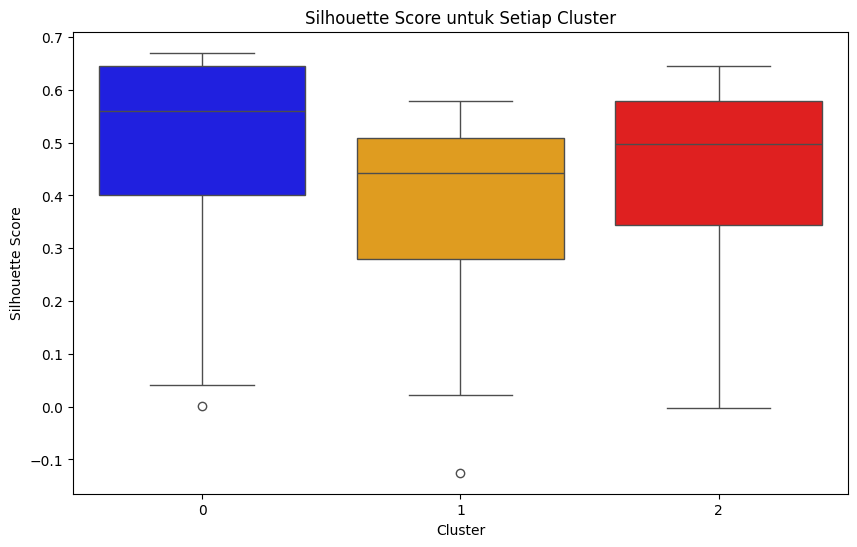

In [ ]:
# Buat plot untuk setiap cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='silhouette_score', data=df, palette=['blue', 'orange', 'red'])
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Setiap Cluster')
plt.show()